In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import pandas as pd

In [2]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
leads_data = [276,406,303,127,131,148,105,146,86]
costs_data = [1690.3,1936.26,1396.88,1305.51,1305.4,1306,1402.54,1832.58,2436.12]
moveins_data = [2,25,37,26,18,42,24,33,34]

n_steps = 3
X, y = prepare_data(moveins_data, n_steps)

In [4]:
print(X),print(y)

[[ 2 25 37]
 [25 37 26]
 [37 26 18]
 [26 18 42]
 [18 42 24]
 [42 24 33]]
[26 18 42 24 33 34]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=2000, verbose=1)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 968.4715
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 958.3057
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 948.8983
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 939.9797
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 931.1824
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 922.4331
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 913.3391
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 904.1290
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 894.6086
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 884.5522
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 873.7286
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 861.9321
Epoch 13/2000
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 2.1037
Epoch 202/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.7048
Epoch 203/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4049
Epoch 204/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.9576
Epoch 205/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6335
Epoch 206/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5083
Epoch 207/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4999
Epoch 208/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5102
Epoch 209/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2877
Epoch 210/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1273
Epoch 211/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2219
Epoch 212/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3826
Epoch 213/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 3.2517e-08
Epoch 397/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.1248e-08
Epoch 398/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.3825e-08
Epoch 399/2000
1/1 [==============================] - 0s 6ms/step - loss: 7.2596e-08
Epoch 400/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.0007e-07
Epoch 401/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.3832e-07
Epoch 402/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.8686e-07
Epoch 403/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.4631e-07
Epoch 404/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.3057e-07
Epoch 405/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.5668e-07
Epoch 406/2000
1/1 [==============================] - 0s 5ms/step - loss: 6.4207e-07
Epoch 407/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.2741

1/1 [==============================] - 0s 6ms/step - loss: 1.1485e-04
Epoch 496/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.1312e-04
Epoch 497/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.7795e-04
Epoch 498/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8968e-06
Epoch 499/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.0656e-04
Epoch 500/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.1501e-04
Epoch 501/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.8961e-05
Epoch 502/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.0058e-06
Epoch 503/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.3980e-05
Epoch 504/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4217e-04
Epoch 505/2000
1/1 [==============================] - 0s 5ms/step - loss: 5.7760e-05
Epoch 506/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.4579

1/1 [==============================] - 0s 6ms/step - loss: 0.0830
Epoch 688/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1581
Epoch 689/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2496
Epoch 690/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3863
Epoch 691/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3911
Epoch 692/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3006
Epoch 693/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 694/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 695/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1177
Epoch 696/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1920
Epoch 697/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1320
Epoch 698/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 699/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 3.4973e-09
Epoch 882/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.6193e-09
Epoch 883/2000
1/1 [==============================] - 0s 6ms/step - loss: 7.2493e-09
Epoch 884/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.0283e-09
Epoch 885/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.9312e-09
Epoch 886/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.7013e-11
Epoch 887/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.7172e-10
Epoch 888/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.8244e-09
Epoch 889/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.9977e-09
Epoch 890/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.3930e-09
Epoch 891/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.9255e-09
Epoch 892/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.8117

1/1 [==============================] - 0s 6ms/step - loss: 1.0991e-05
Epoch 1076/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.6616e-04
Epoch 1077/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.9408e-04
Epoch 1078/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.9105e-04
Epoch 1079/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9888e-04
Epoch 1080/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.3716e-06
Epoch 1081/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.5573e-04
Epoch 1082/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.3713e-05
Epoch 1083/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4771e-04
Epoch 1084/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.2046e-04
Epoch 1085/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.0545e-05
Epoch 1086/2000
1/1 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 4.5475e-11
Epoch 1266/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.8199e-11
Epoch 1267/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.1547e-11
Epoch 1268/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.2751e-11
Epoch 1269/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.6917e-10
Epoch 1270/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.2443e-11
Epoch 1271/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8316e-10
Epoch 1272/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.8199e-11
Epoch 1273/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.2681e-10
Epoch 1274/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.7584e-11
Epoch 1275/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.8021e-10
Epoch 1276/2000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 7ms/step - loss: 6.0633e-12
Epoch 1456/2000
1/1 [==============================] - 0s 8ms/step - loss: 5.4570e-12
Epoch 1457/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.0633e-12
Epoch 1458/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.0316e-12
Epoch 1459/2000
1/1 [==============================] - 0s 9ms/step - loss: 6.0633e-12
Epoch 1460/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.4886e-12
Epoch 1461/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.0633e-12
Epoch 1462/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4253e-12
Epoch 1463/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.0316e-12
Epoch 1464/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.4570e-12
Epoch 1465/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.4570e-12
Epoch 1466/2000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 6.0633e-13
Epoch 1646/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.0633e-13
Epoch 1647/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.6380e-12
Epoch 1648/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.6380e-12
Epoch 1649/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.2127e-12
Epoch 1650/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.2127e-12
Epoch 1651/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.2127e-12
Epoch 1652/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.0633e-13
Epoch 1653/2000
1/1 [==============================] - 0s 5ms/step - loss: 6.0633e-13
Epoch 1654/2000
1/1 [==============================] - 0s 5ms/step - loss: 6.0633e-13
Epoch 1655/2000
1/1 [==============================] - 0s 5ms/step - loss: 6.0633e-13
Epoch 1656/2000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 7ms/step - loss: 2.4253e-12
Epoch 1836/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.4253e-12
Epoch 1837/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.0316e-12
Epoch 1838/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.0316e-12
Epoch 1839/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.4253e-12
Epoch 1840/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4253e-12
Epoch 1841/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.0633e-13
Epoch 1842/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4253e-12
Epoch 1843/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.6380e-12
Epoch 1844/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.6696e-12
Epoch 1845/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.6696e-12
Epoch 1846/2000
1/1 [==============================] - 0s 8ms/step - l

In [8]:
from array import array 
x_input = np.array([2,25,37])
temp_input=list(x_input)
moveins_prediction=[]
i=0
while(i<10):
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        moveins_prediction.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        moveins_prediction.append(yhat[0][0])
        i=i+1

print(moveins_prediction)

[26.000216]
1 day input [25.         37.         26.00021553]
1 day output [[18.001806]]
2 day input [37.         26.00021553 18.00180626]
2 day output [[41.99987]]
3 day input [26.000216 18.001806 41.99987 ]
3 day output [[23.998163]]
4 day input [18.001806 41.99987  23.998163]
4 day output [[33.000523]]
5 day input [41.99987  23.998163 33.000523]
5 day output [[34.007156]]
6 day input [23.998163 33.000523 34.007156]
6 day output [[16.006086]]
7 day input [33.000523 34.007156 16.006086]
7 day output [[31.35953]]
8 day input [34.007156 16.006086 31.35953 ]
8 day output [[45.94201]]
9 day input [16.006086 31.35953  45.94201 ]
9 day output [[26.071753]]
[26.000216, 18.001806, 41.99987, 23.998163, 33.000523, 34.007156, 16.006086, 31.35953, 45.94201, 26.071753]


In [9]:
moveins_data

[2, 25, 37, 26, 18, 42, 24, 33, 34]

In [10]:
len(moveins_data)

9

In [11]:
import matplotlib.pyplot as plt

In [12]:
month_new=np.arange(1,10)
month_pred=np.arange(10,20)

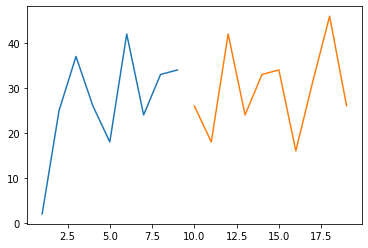

In [13]:
plt.plot(month_new,moveins_data)
plt.plot(month_pred,moveins_prediction)

In [14]:
moveins_prediction = pd.DataFrame(moveins_prediction)

In [15]:
moveins_prediction = moveins_prediction.round(0)

In [16]:
X1, y1 = prepare_data(leads_data, n_steps)
print(X1),print(y1)

n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X1, y1, epochs=2000, verbose=1)

[[276 406 303]
 [406 303 127]
 [303 127 131]
 [127 131 148]
 [131 148 105]
 [148 105 146]]
[127 131 148 105 146  86]
Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 16336.5195
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 15879.0576
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 15494.4111
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 15085.2412
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 14638.0732
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 14075.4414
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 13388.7959
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 12661.5908
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 11880.9072
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 11204.8408
Epoch 11/2000
1/1 [==============================] - 

1/1 [==============================] - 0s 6ms/step - loss: 2.0615e-05
Epoch 199/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.0250e-05
Epoch 200/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.8025e-05
Epoch 201/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.3227e-05
Epoch 202/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.8527e-05
Epoch 203/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.1467e-05
Epoch 204/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4686e-05
Epoch 205/2000
1/1 [==============================] - 0s 6ms/step - loss: 7.4641e-06
Epoch 206/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.1325e-05
Epoch 207/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.6567e-06
Epoch 208/2000
1/1 [==============================] - 0s 5ms/step - loss: 9.6749e-06
Epoch 209/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.1415

1/1 [==============================] - 0s 5ms/step - loss: 1.3000e-09
Epoch 391/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.7447e-09
Epoch 392/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.7164e-10
Epoch 393/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.7656e-09
Epoch 394/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.2612e-09
Epoch 395/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.4102e-10
Epoch 396/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2984e-09
Epoch 397/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.8506e-10
Epoch 398/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.2461e-10
Epoch 399/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.7462e-10
Epoch 400/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.3679e-09
Epoch 401/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.9880

1/1 [==============================] - 0s 6ms/step - loss: 1.3291e-09
Epoch 583/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.8995e-08
Epoch 584/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9201e-08
Epoch 585/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.1525e-08
Epoch 586/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4253e-10
Epoch 587/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.3116e-08
Epoch 588/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.9917e-08
Epoch 589/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.7595e-09
Epoch 590/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.9775e-10
Epoch 591/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.5976e-09
Epoch 592/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.5080e-09
Epoch 593/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.2783

1/1 [==============================] - 0s 6ms/step - loss: 0.0336
Epoch 778/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0165
Epoch 779/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 780/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 781/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 782/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 783/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 784/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 785/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 786/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 787/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 788/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 789/2000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 2.1343e-10
Epoch 971/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.4102e-10
Epoch 972/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.9775e-10
Epoch 973/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.6267e-10
Epoch 974/2000
1/1 [==============================] - 0s 7ms/step - loss: 7.1789e-10
Epoch 975/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.0745e-10
Epoch 976/2000
1/1 [==============================] - 0s 5ms/step - loss: 5.2387e-10
Epoch 977/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9775e-10
Epoch 978/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.3656e-10
Epoch 979/2000
1/1 [==============================] - 0s 5ms/step - loss: 5.6267e-10
Epoch 980/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.0373e-10
Epoch 981/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.2119

1/1 [==============================] - 0s 6ms/step - loss: 2.9104e-10
Epoch 1161/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.7462e-10
Epoch 1162/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.4028e-10
Epoch 1163/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.2686e-10
Epoch 1164/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.1642e-10
Epoch 1165/2000
1/1 [==============================] - 0s 5ms/step - loss: 4.6566e-10
Epoch 1166/2000
1/1 [==============================] - 0s 7ms/step - loss: 7.4700e-10
Epoch 1167/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.6007e-09
Epoch 1168/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.1343e-10
Epoch 1169/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.5895e-10
Epoch 1170/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.4253e-10
Epoch 1171/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 10ms/step - loss: 5.5993e-07
Epoch 1355/2000
1/1 [==============================] - 0s 9ms/step - loss: 4.5731e-06
Epoch 1356/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.4762e-06
Epoch 1357/2000
1/1 [==============================] - 0s 10ms/step - loss: 7.7173e-07
Epoch 1358/2000
1/1 [==============================] - 0s 8ms/step - loss: 3.4244e-06
Epoch 1359/2000
1/1 [==============================] - 0s 11ms/step - loss: 6.9761e-07
Epoch 1360/2000
1/1 [==============================] - 0s 14ms/step - loss: 9.6203e-07
Epoch 1361/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.4083e-06
Epoch 1362/2000
1/1 [==============================] - 0s 9ms/step - loss: 3.1096e-07
Epoch 1363/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.9466e-07
Epoch 1364/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.5836e-06
Epoch 1365/2000
1/1 [==============================] - 0s 10ms/st

1/1 [==============================] - 0s 6ms/step - loss: 1.5522e-10
Epoch 1545/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8134e-10
Epoch 1546/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.6492e-10
Epoch 1547/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9104e-10
Epoch 1548/2000
1/1 [==============================] - 0s 8ms/step - loss: 8.7311e-11
Epoch 1549/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.3283e-10
Epoch 1550/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.1343e-10
Epoch 1551/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.8805e-10
Epoch 1552/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.2612e-10
Epoch 1553/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.4626e-10
Epoch 1554/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.7462e-10
Epoch 1555/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 7ms/step - loss: 3.7350e-09
Epoch 1735/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.0477e-09
Epoch 1736/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0373e-10
Epoch 1737/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.5522e-09
Epoch 1738/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.9403e-10
Epoch 1739/2000
1/1 [==============================] - 0s 8ms/step - loss: 9.0222e-10
Epoch 1740/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.5619e-09
Epoch 1741/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.4327e-10
Epoch 1742/2000
1/1 [==============================] - 0s 7ms/step - loss: 7.1789e-10
Epoch 1743/2000
1/1 [==============================] - 0s 10ms/step - loss: 3.8902e-09
Epoch 1744/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.3260e-09
Epoch 1745/2000
1/1 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 1925/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 1926/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 1927/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 1928/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0267
Epoch 1929/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0474
Epoch 1930/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0866
Epoch 1931/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1536
Epoch 1932/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2851
Epoch 1933/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4953
Epoch 1934/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.9194
Epoch 1935/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4836
Epoch 1936/2000
1/1 [===========

In [17]:
from array import array 
x1_input = np.array([276,406,303])
temp1_input=list(x1_input)
leads_prediction=[]
i=0
while(i<10):
    if(len(temp1_input)>3):
        x1_input=np.array(temp1_input[1:])
        print("{} day input {}".format(i,x1_input))
        #print(x_input)
        x1_input = x1_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x1_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp1_input.append(yhat[0][0])
        temp1_input=temp1_input[1:]
        #print(temp_input)
        leads_prediction.append(yhat[0][0])
        i=i+1
    else:
        x1_input = x1_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x1_input, verbose=0)
        print(yhat[0])
        temp1_input.append(yhat[0][0])
        leads_prediction.append(yhat[0][0])
        i=i+1
    
print(leads_prediction)

[127.00501]
1 day input [406.         303.         127.00501251]
1 day output [[131.00308]]
2 day input [303.         127.00501251 131.00308228]
2 day output [[148.02495]]
3 day input [127.00501 131.00308 148.02495]
3 day output [[105.03947]]
4 day input [131.00308 148.02495 105.03947]
4 day output [[146.0461]]
5 day input [148.02495 105.03947 146.0461 ]
5 day output [[86.04154]]
6 day input [105.03947 146.0461   86.04154]
6 day output [[147.34663]]
7 day input [146.0461   86.04154 147.34663]
7 day output [[77.505844]]
8 day input [ 86.04154  147.34663   77.505844]
8 day output [[141.77098]]
9 day input [147.34663   77.505844 141.77098 ]
9 day output [[77.43591]]
[127.00501, 131.00308, 148.02495, 105.03947, 146.0461, 86.04154, 147.34663, 77.505844, 141.77098, 77.43591]


In [18]:
leads_prediction = pd.DataFrame(leads_prediction)

In [19]:
leads_prediction = leads_prediction.round(0)

In [20]:
X2, y2 = prepare_data(costs_data, n_steps)
print(X2),print(y2)

n_features = 1
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X2, y2, epochs=2000, verbose=1)


[[1690.3  1936.26 1396.88]
 [1936.26 1396.88 1305.51]
 [1396.88 1305.51 1305.4 ]
 [1305.51 1305.4  1306.  ]
 [1305.4  1306.   1402.54]
 [1306.   1402.54 1832.58]]
[1305.51 1305.4  1306.   1402.54 1832.58 2436.12]
Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 2493967.7500
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 2458657.0000
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 2428053.7500
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 2396309.0000
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 2363369.0000
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 2333875.7500
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 2304840.0000
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 2274985.7500
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 2243522.7500
Epoch 10/2000
1/1 [====

1/1 [==============================] - 0s 10ms/step - loss: 56006.4375
Epoch 190/2000
1/1 [==============================] - 0s 9ms/step - loss: 54934.3008
Epoch 191/2000
1/1 [==============================] - 0s 8ms/step - loss: 53291.3164
Epoch 192/2000
1/1 [==============================] - 0s 10ms/step - loss: 51950.1367
Epoch 193/2000
1/1 [==============================] - 0s 10ms/step - loss: 50929.3320
Epoch 194/2000
1/1 [==============================] - 0s 13ms/step - loss: 49406.1367
Epoch 195/2000
1/1 [==============================] - 0s 13ms/step - loss: 47881.1719
Epoch 196/2000
1/1 [==============================] - 0s 11ms/step - loss: 47058.1562
Epoch 197/2000
1/1 [==============================] - 0s 9ms/step - loss: 45816.1602
Epoch 198/2000
1/1 [==============================] - 0s 10ms/step - loss: 45098.8477
Epoch 199/2000
1/1 [==============================] - 0s 10ms/step - loss: 43679.3047
Epoch 200/2000
1/1 [==============================] - 0s 11ms/step - los

1/1 [==============================] - 0s 6ms/step - loss: 845.6235
Epoch 287/2000
1/1 [==============================] - 0s 7ms/step - loss: 803.8619
Epoch 288/2000
1/1 [==============================] - 0s 5ms/step - loss: 764.3039
Epoch 289/2000
1/1 [==============================] - 0s 6ms/step - loss: 726.0983
Epoch 290/2000
1/1 [==============================] - 0s 7ms/step - loss: 689.3547
Epoch 291/2000
1/1 [==============================] - 0s 7ms/step - loss: 655.2199
Epoch 292/2000
1/1 [==============================] - 0s 5ms/step - loss: 626.2294
Epoch 293/2000
1/1 [==============================] - 0s 5ms/step - loss: 595.0897
Epoch 294/2000
1/1 [==============================] - 0s 5ms/step - loss: 564.8987
Epoch 295/2000
1/1 [==============================] - 0s 5ms/step - loss: 537.3880
Epoch 296/2000
1/1 [==============================] - 0s 6ms/step - loss: 510.6183
Epoch 297/2000
1/1 [==============================] - 0s 6ms/step - loss: 483.6739
Epoch 298/2000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 486/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 487/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 488/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 489/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 490/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 491/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 492/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 493/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 494/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 495/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 496/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 497/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 81908.5078
Epoch 681/2000
1/1 [==============================] - 0s 6ms/step - loss: 127216.3516
Epoch 682/2000
1/1 [==============================] - 0s 6ms/step - loss: 74566.6953
Epoch 683/2000
1/1 [==============================] - 0s 7ms/step - loss: 74930.1797
Epoch 684/2000
1/1 [==============================] - 0s 6ms/step - loss: 76427.3125
Epoch 685/2000
1/1 [==============================] - 0s 6ms/step - loss: 77330.9766
Epoch 686/2000
1/1 [==============================] - 0s 6ms/step - loss: 72749.3359
Epoch 687/2000
1/1 [==============================] - 0s 6ms/step - loss: 44565.9336
Epoch 688/2000
1/1 [==============================] - 0s 6ms/step - loss: 94132.7500
Epoch 689/2000
1/1 [==============================] - 0s 6ms/step - loss: 52302.3633
Epoch 690/2000
1/1 [==============================] - 0s 6ms/step - loss: 74527.2812
Epoch 691/2000
1/1 [==============================] - 0s 6ms/step - loss: 65447

1/1 [==============================] - 0s 6ms/step - loss: 1135.4948
Epoch 875/2000
1/1 [==============================] - 0s 7ms/step - loss: 1034.0154
Epoch 876/2000
1/1 [==============================] - 0s 6ms/step - loss: 1093.4283
Epoch 877/2000
1/1 [==============================] - 0s 6ms/step - loss: 1120.5220
Epoch 878/2000
1/1 [==============================] - 0s 5ms/step - loss: 998.9124
Epoch 879/2000
1/1 [==============================] - 0s 6ms/step - loss: 1033.5601
Epoch 880/2000
1/1 [==============================] - 0s 6ms/step - loss: 1087.3485
Epoch 881/2000
1/1 [==============================] - 0s 6ms/step - loss: 979.2863
Epoch 882/2000
1/1 [==============================] - 0s 6ms/step - loss: 989.4675
Epoch 883/2000
1/1 [==============================] - 0s 6ms/step - loss: 1045.4850
Epoch 884/2000
1/1 [==============================] - 0s 6ms/step - loss: 961.8848
Epoch 885/2000
1/1 [==============================] - 0s 6ms/step - loss: 947.0959
Epoch 886/20

1/1 [==============================] - 0s 6ms/step - loss: 328.7632
Epoch 1070/2000
1/1 [==============================] - 0s 6ms/step - loss: 334.2222
Epoch 1071/2000
1/1 [==============================] - 0s 6ms/step - loss: 362.2115
Epoch 1072/2000
1/1 [==============================] - 0s 8ms/step - loss: 392.3489
Epoch 1073/2000
1/1 [==============================] - 0s 6ms/step - loss: 422.2679
Epoch 1074/2000
1/1 [==============================] - 0s 5ms/step - loss: 438.8770
Epoch 1075/2000
1/1 [==============================] - 0s 6ms/step - loss: 434.5617
Epoch 1076/2000
1/1 [==============================] - 0s 6ms/step - loss: 411.4303
Epoch 1077/2000
1/1 [==============================] - 0s 6ms/step - loss: 386.9208
Epoch 1078/2000
1/1 [==============================] - 0s 6ms/step - loss: 358.3365
Epoch 1079/2000
1/1 [==============================] - 0s 5ms/step - loss: 336.8968
Epoch 1080/2000
1/1 [==============================] - 0s 9ms/step - loss: 316.8758
Epoch 10

1/1 [==============================] - 0s 6ms/step - loss: 876.0019
Epoch 1264/2000
1/1 [==============================] - 0s 6ms/step - loss: 903.7053
Epoch 1265/2000
1/1 [==============================] - 0s 6ms/step - loss: 810.2823
Epoch 1266/2000
1/1 [==============================] - 0s 6ms/step - loss: 733.3109
Epoch 1267/2000
1/1 [==============================] - 0s 6ms/step - loss: 675.8804
Epoch 1268/2000
1/1 [==============================] - 0s 6ms/step - loss: 662.4051
Epoch 1269/2000
1/1 [==============================] - 0s 6ms/step - loss: 619.8168
Epoch 1270/2000
1/1 [==============================] - 0s 6ms/step - loss: 657.9941
Epoch 1271/2000
1/1 [==============================] - 0s 6ms/step - loss: 727.8359
Epoch 1272/2000
1/1 [==============================] - 0s 6ms/step - loss: 843.9990
Epoch 1273/2000
1/1 [==============================] - 0s 6ms/step - loss: 864.7674
Epoch 1274/2000
1/1 [==============================] - 0s 6ms/step - loss: 837.2388
Epoch 12

1/1 [==============================] - 0s 7ms/step - loss: 468.1626
Epoch 1458/2000
1/1 [==============================] - 0s 6ms/step - loss: 477.0274
Epoch 1459/2000
1/1 [==============================] - 0s 6ms/step - loss: 480.8579
Epoch 1460/2000
1/1 [==============================] - 0s 6ms/step - loss: 488.7792
Epoch 1461/2000
1/1 [==============================] - 0s 7ms/step - loss: 496.1588
Epoch 1462/2000
1/1 [==============================] - 0s 6ms/step - loss: 506.2022
Epoch 1463/2000
1/1 [==============================] - 0s 5ms/step - loss: 508.5314
Epoch 1464/2000
1/1 [==============================] - 0s 6ms/step - loss: 508.2076
Epoch 1465/2000
1/1 [==============================] - 0s 6ms/step - loss: 498.4539
Epoch 1466/2000
1/1 [==============================] - 0s 7ms/step - loss: 490.2269
Epoch 1467/2000
1/1 [==============================] - 0s 5ms/step - loss: 478.9900
Epoch 1468/2000
1/1 [==============================] - 0s 5ms/step - loss: 469.1941
Epoch 14

1/1 [==============================] - 0s 5ms/step - loss: 244.5173
Epoch 1652/2000
1/1 [==============================] - 0s 6ms/step - loss: 249.5005
Epoch 1653/2000
1/1 [==============================] - 0s 6ms/step - loss: 239.6629
Epoch 1654/2000
1/1 [==============================] - 0s 6ms/step - loss: 244.4615
Epoch 1655/2000
1/1 [==============================] - 0s 5ms/step - loss: 234.9191
Epoch 1656/2000
1/1 [==============================] - 0s 6ms/step - loss: 239.8520
Epoch 1657/2000
1/1 [==============================] - 0s 6ms/step - loss: 230.8268
Epoch 1658/2000
1/1 [==============================] - 0s 7ms/step - loss: 236.1055
Epoch 1659/2000
1/1 [==============================] - 0s 6ms/step - loss: 227.5559
Epoch 1660/2000
1/1 [==============================] - 0s 6ms/step - loss: 233.1923
Epoch 1661/2000
1/1 [==============================] - 0s 5ms/step - loss: 224.5104
Epoch 1662/2000
1/1 [==============================] - 0s 5ms/step - loss: 229.8856
Epoch 16

1/1 [==============================] - 0s 9ms/step - loss: 274.5078
Epoch 1846/2000
1/1 [==============================] - 0s 7ms/step - loss: 292.6984
Epoch 1847/2000
1/1 [==============================] - 0s 6ms/step - loss: 276.0199
Epoch 1848/2000
1/1 [==============================] - 0s 6ms/step - loss: 294.8661
Epoch 1849/2000
1/1 [==============================] - 0s 7ms/step - loss: 278.6109
Epoch 1850/2000
1/1 [==============================] - 0s 6ms/step - loss: 298.3578
Epoch 1851/2000
1/1 [==============================] - 0s 5ms/step - loss: 282.2918
Epoch 1852/2000
1/1 [==============================] - 0s 7ms/step - loss: 302.8113
Epoch 1853/2000
1/1 [==============================] - 0s 6ms/step - loss: 286.6683
Epoch 1854/2000
1/1 [==============================] - 0s 6ms/step - loss: 307.9605
Epoch 1855/2000
1/1 [==============================] - 0s 6ms/step - loss: 291.4747
Epoch 1856/2000
1/1 [==============================] - 0s 6ms/step - loss: 313.1151
Epoch 18

In [21]:
from array import array 
x2_input = np.array([1690.3,1936.26,1396.88])
temp2_input=list(x2_input)
costs_prediction=[]
i=0
while(i<10):
    if(len(temp2_input)>3):
        x2_input=np.array(temp2_input[1:])
        print("{} day input {}".format(i,x2_input))
        #print(x_input)
        x2_input = x2_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x2_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp2_input.append(yhat[0][0])
        temp2_input=temp2_input[1:]
        #print(temp_input)
        costs_prediction.append(yhat[0][0])
        i=i+1
    else:
        x2_input = x2_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x2_input, verbose=0)
        print(yhat[0])
        temp2_input.append(yhat[0][0])
        costs_prediction.append(yhat[0][0])
        i=i+1
    
print(costs_prediction)

[1306.3859]
1 day input [1936.26       1396.88       1306.38586426]
1 day output [[1305.3678]]
2 day input [1396.88       1306.38586426 1305.36779785]
2 day output [[1303.3136]]
3 day input [1306.3859 1305.3678 1303.3136]
3 day output [[1396.0114]]
4 day input [1305.3678 1303.3136 1396.0114]
4 day output [[1732.4553]]
5 day input [1303.3136 1396.0114 1732.4553]
5 day output [[2388.1057]]
6 day input [1396.0114 1732.4553 2388.1057]
6 day output [[2912.7163]]
7 day input [1732.4553 2388.1057 2912.7163]
7 day output [[3729.734]]
8 day input [2388.1057 2912.7163 3729.734 ]
8 day output [[4815.284]]
9 day input [2912.7163 3729.734  4815.284 ]
9 day output [[6075.6665]]
[1306.3859, 1305.3678, 1303.3136, 1396.0114, 1732.4553, 2388.1057, 2912.7163, 3729.734, 4815.284, 6075.6665]


In [22]:
costs_prediction = pd.DataFrame(costs_prediction)
costs_prediction = costs_prediction.round(2)

In [23]:
leads_prediction = leads_prediction.rename(columns={0: 'Leads'})
costs_prediction = costs_prediction.rename(columns={0: 'Cost'})
moveins_prediction = moveins_prediction.rename(columns={0: 'Moveins'})

In [24]:
df1 = pd.merge(leads_prediction, costs_prediction, left_index=True, right_index=True)
df2 = pd.merge(df1, moveins_prediction, left_index=True, right_index=True)

In [25]:
df2

,Leads,Cost,Moveins
0,127.0,1306.39,26.0
1,131.0,1305.37,18.0
2,148.0,1303.31,42.0
3,105.0,1396.01,24.0
4,146.0,1732.46,33.0
5,86.0,2388.11,34.0
6,147.0,2912.72,16.0
7,78.0,3729.73,31.0
8,142.0,4815.28,46.0
9,77.0,6075.67,26.0


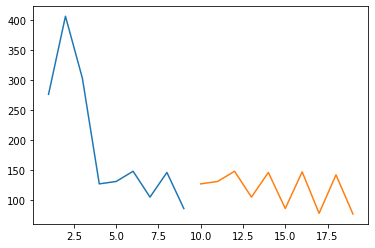

In [26]:
plt.plot(month_new,leads_data)
plt.plot(month_pred,leads_prediction)

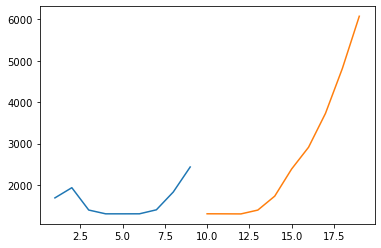

In [27]:
plt.plot(month_new,costs_data)
plt.plot(month_pred,costs_prediction)

In [41]:
conversion_rate = 100 * moveins_prediction["Moveins"].div(leads_prediction["Leads"]);
conversion_rate = pd.DataFrame(conversion_rate)
conversion_rate = conversion_rate.rename(columns={0: 'Conversion Rate'})

In [43]:
conversion_rate= conversion_rate.round(2)

In [44]:
conversion_rate

,Conversion Rate
0,20.47
1,13.74
2,28.38
3,22.86
4,22.60
5,39.53
6,10.88
7,39.74
8,32.39
9,33.77


In [45]:
df3 = pd.merge(df2,conversion_rate, left_index=True, right_index=True)

In [47]:
df3.to_csv("prediction.csv")